In [308]:
# Herzlich willkommen zu der Datenanalyse des "Chocolate Bar Ratings Dataset", 
# einem Datenbestand mit Bewertungen verschiedenster Schokoladen. Das Dataset haben wir von 
# https://www.kaggle.com/rtatman/chocolate-bar-ratings. Dabei wurden von uns noch ein paar kleine Änderungen vorgenommen, 
# um die Analyse etwas spannender zu machen.
# Dieses Dokument ist ein kleines add on zu der Folge "PREPROCESSING - was man in der Uni nicht lernt" von The Erium Podcast.
# Solltet ihr die Folge noch nicht gehört haben, tut das am besten direkt unter theeriumpodcast.de, auf Spotify oder 
# Apple Podcasts. So wird deutlicher was gleich hier passiert.
# Aber nun genug davon und ran an die Analyse.
# Zunächst importieren wir die nötigen Bibliotheken für unser Preprocessing und die Analyse.
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [309]:
# Nun lesen wir die CSV-Datei ein und verschaffen uns einen ersten Überblick über den Dataframe.
df = pd.read_csv('flavors_of_cacao.csv')
df.head()

Unnamed: 0 Company \n(Maker-if known) Specific Bean Origin\nor Bar Name  \
0           0                   A. Morin                       Agua Grande   
1           1                   A. Morin                             Kpime   
2           2                   A. Morin                            Atsane   
3           3                   A. Morin                             Akata   
4           4                   A. Morin                            Quilla   

      REF  Review\nDate Cocoa\nPercent Company\nLocation  Rating Bean\nType  \
0  1876.0        2016.0            63%            France    3.75              
1  1676.0        2015.0            70%            France    2.75              
2  1676.0        2015.0            70%            France    3.00              
3  1680.0        2015.0            70%            France    3.50              
4  1704.0        2015.0            70%            France    3.50              

  Broad Bean\nOrigin  
0           Sao Tome  
1               Togo  
2               Togo  
3               Togo  
4               Peru

In [310]:
# Unser Dataframe hat 10 Spalten, von denen die erste völlig redundant ist. Wir werden sie direkt entfernen.
df = df.drop(['Unnamed: 0'], axis=1)
# Danach folgen: die Firma, der genaue Bohnentyp, der REF (je höher desto neuer die Bewertung), 
# das Jahr in dem die Bewertung stattfand, der Kakaogehalt, das Land aus dem die Firma kommt, 
# die Bewertung, der Bohnentyp und das Land aus dem die Bohne stammt.
# Eine sehr wichtige Information ist die Anzal der Zeilen.
df.shape

(1795, 9)

In [311]:
# Wir haben hier also 1795 Zeilen. Aus Komfortgründen benennen wir die einzelnen Spalten für den weiteren Verlauf um.
df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [312]:
new_names = {
    df.columns[0]: 'company',
    'Specific Bean Origin\nor Bar Name': 'bar_origin',
    'REF': 'review_update_value',
    'Review\nDate': 'review_pub_date',
    'Cocoa\nPercent': 'cocoa_percentage',
    'Company\nLocation': 'company_location',
    'Rating': 'rating',
    'Bean\nType': 'bean_type',
    'Broad Bean\nOrigin': 'bean_origin'
}
df = df.rename(new_names, axis = 'columns')

In [313]:
# Weiter möchten wir nicht, dass der Kakaogehalt z.B. in der Form "70%" auftritt, sondern als numerischer Wert, welcher
# die Information repräsentiert. Bei dem Beispiel von eben bietet sich z.B. "0,7" an.
df['cocoa_percentage'] = df['cocoa_percentage'].str.rstrip('%').astype('float')/100.0

In [314]:
#Schauen wir uns nun einmal an wie unser Dataframe bis jetzt aussieht.
df.head()

company   bar_origin  review_update_value  review_pub_date  \
0  A. Morin  Agua Grande               1876.0           2016.0   
1  A. Morin        Kpime               1676.0           2015.0   
2  A. Morin       Atsane               1676.0           2015.0   
3  A. Morin        Akata               1680.0           2015.0   
4  A. Morin       Quilla               1704.0           2015.0   

   cocoa_percentage company_location  rating bean_type bean_origin  
0              0.63           France    3.75              Sao Tome  
1              0.70           France    2.75                  Togo  
2              0.70           France    3.00                  Togo  
3              0.70           France    3.50                  Togo  
4              0.70           France    3.50                  Peru

In [315]:
# Was einem sofort auffällt sind die fehlenden Einträge in der Spalte 'bean_type'. Das sind sogenannte Missing Values,
# welche wir nun noch bearbeiten müssen, da sie uns die Analyse verfälschen könnten. Wie man mit Missing Values verfährt,
# hängt immer auch von der Anzahl der selbiger ab. Lasst uns also zunächst herausfinden wo und vor allem wie gravierend 
# Missing Values in unserem Dataframe auftauchen.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
company                1795 non-null object
bar_origin             1795 non-null object
review_update_value    1795 non-null float64
review_pub_date        1795 non-null float64
cocoa_percentage       1795 non-null float64
company_location       1795 non-null object
rating                 1795 non-null float64
bean_type              1794 non-null object
bean_origin            1794 non-null object
dtypes: float64(4), object(5)
memory usage: 126.3+ KB


In [316]:
# Laut Python fehlen in den Spalten 'bean_type' und 'bean_origin' jeweils nur ein Eintrag.
# Schauen wir uns nochmal die ersten Zeilen unseres Dataframes an.
df.head()

company   bar_origin  review_update_value  review_pub_date  \
0  A. Morin  Agua Grande               1876.0           2016.0   
1  A. Morin        Kpime               1676.0           2015.0   
2  A. Morin       Atsane               1676.0           2015.0   
3  A. Morin        Akata               1680.0           2015.0   
4  A. Morin       Quilla               1704.0           2015.0   

   cocoa_percentage company_location  rating bean_type bean_origin  
0              0.63           France    3.75              Sao Tome  
1              0.70           France    2.75                  Togo  
2              0.70           France    3.00                  Togo  
3              0.70           France    3.50                  Togo  
4              0.70           France    3.50                  Peru

In [317]:
# Das zeigt uns, dass hier irgendetwas nicht stimmen kann, da bereits in den ersten 5 Zeilen Werte bei 'bean_type' fehlen
# und nicht nur einer, wie es uns von "df.info()" mitgeteilt wird. Scheinbar wurde die Tatsache, dass ein Wert in einer Zeile 
# fehlt anders beschrieben als mit "NaN". Ein Blick in den Array verrät mehr.
df.values

array([['A. Morin', 'Agua Grande', 1876.0, ..., 3.75, '\xa0', 'Sao Tome'],
       ['A. Morin', 'Kpime', 1676.0, ..., 2.75, '\xa0', 'Togo'],
       ['A. Morin', 'Atsane', 1676.0, ..., 3.0, '\xa0', 'Togo'],
       ...,
       ['Zotter', 'Kerala State', 749.0, ..., 3.5, 'Forastero', 'India'],
       ['Zotter', 'Kerala State', 781.0, ..., 3.25, '\xa0', 'India'],
       ['Zotter', 'Brazil, Mitzi Blue', 486.0, ..., 3.0, '\xa0',
        'Brazil']], dtype=object)

In [318]:
# Hieraus können wir ablesen, dass Missing Values mit "\xa0" notiert wurden. So können wir nun herausfinden wie viele Werte bei 
# 'bean_type' fehlen.
df[df.bean_type != '\xa0'].shape

(908, 9)

In [319]:
# Insgesamt fehlen in der Spalte 'bean_type' also 887 Einträge; fast die Hälfte! Das macht die Spalte für unsere Analyse
# relativ wertlos. Wir nehmen sie daher raus.
df = df.drop(['bean_type'], axis=1)
df.head()

company   bar_origin  review_update_value  review_pub_date  \
0  A. Morin  Agua Grande               1876.0           2016.0   
1  A. Morin        Kpime               1676.0           2015.0   
2  A. Morin       Atsane               1676.0           2015.0   
3  A. Morin        Akata               1680.0           2015.0   
4  A. Morin       Quilla               1704.0           2015.0   

   cocoa_percentage company_location  rating bean_origin  
0              0.63           France    3.75    Sao Tome  
1              0.70           France    2.75        Togo  
2              0.70           France    3.00        Togo  
3              0.70           France    3.50        Togo  
4              0.70           France    3.50        Peru

In [320]:
# Ähnlich wie eben untersuchen wir auch 'bean_origin' auf Missing Values.
df[df.bean_origin != '\xa0'].shape

(1722, 8)

In [321]:
# Hier ist das Problem weitaus weniger gravierend, denn es fehlen nur 73 Einträge in dieser Spalte. Da dies nur einen geringen
# Anteil der Zeilen ausmacht, können wir sie getroßt von unserem Dataframe entfernen.
df = df[df.bean_origin != '\xa0']

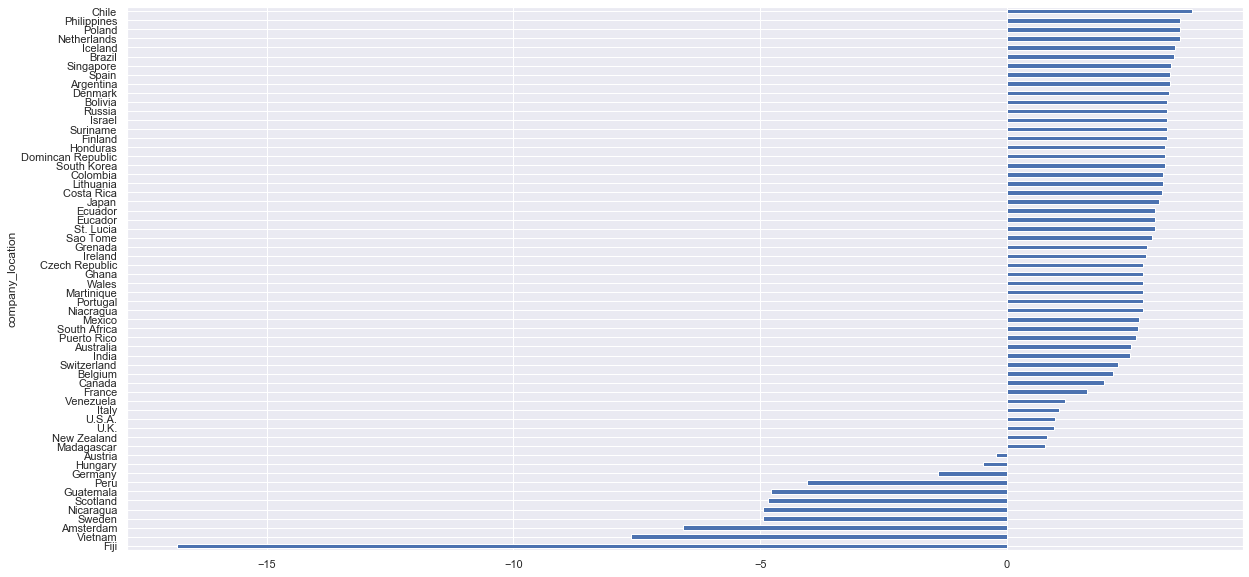

In [322]:
# Beginnen wir mit der Analyse.
# Wir werden nun die Frage beantworten, wo die Firmen mit den im Schnitt besten Schokoladen angesiedelt sind.
# Dazu betrachten wir den folgenden Plot:
sns.set(font_scale=1)
ax = df.groupby(['company_location'])['rating'].mean().sort_values().plot.barh(figsize=(20,10))
plt.show()

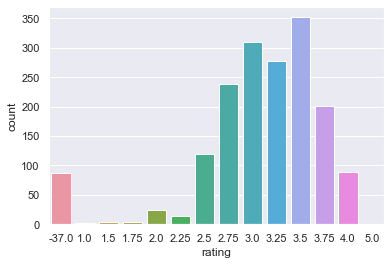

In [323]:
# Moment. Dieser Graph ist komplett verwirrend. Woher kommen diese lächerlich schlechten Bewertungen?
# Werfen wir lieber nochmal einen Blick auf ein Histogramm, das uns verrät, 
# welches Rating wie of gegeben wurde.
ax = sns.countplot(x='rating', data=df)

In [324]:
# Aha! Scheinbar haben es manche Kritiker geschafft ein Rating von "-37" abzugeben, was natürlich absolut keinen Sinn macht. 
# Vermutlich wollten die Ersteller dieses Datasets damit einen Missing Value kennzeichnen. 
# Das Histogramm verrät es schon ein wenig, aber schauen wir uns mal an wie gravierend 
# die Anzahl der Missing Values in "rating" sind.
df[df.rating != -37].shape

(1635, 8)

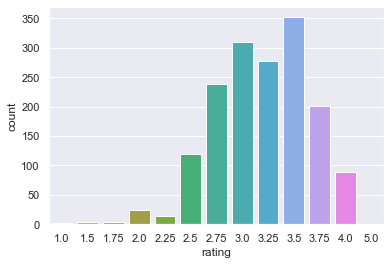

In [325]:
# Erneut ist das Problem der Missing Values nicht schlimm. Wir entfernen wieder die entsprechenden Spalten...
df = df[df.rating != -37]
# ...und schauen uns anschließend nochmal das Histogramm an.
ax = sns.countplot(x='rating', data=df)

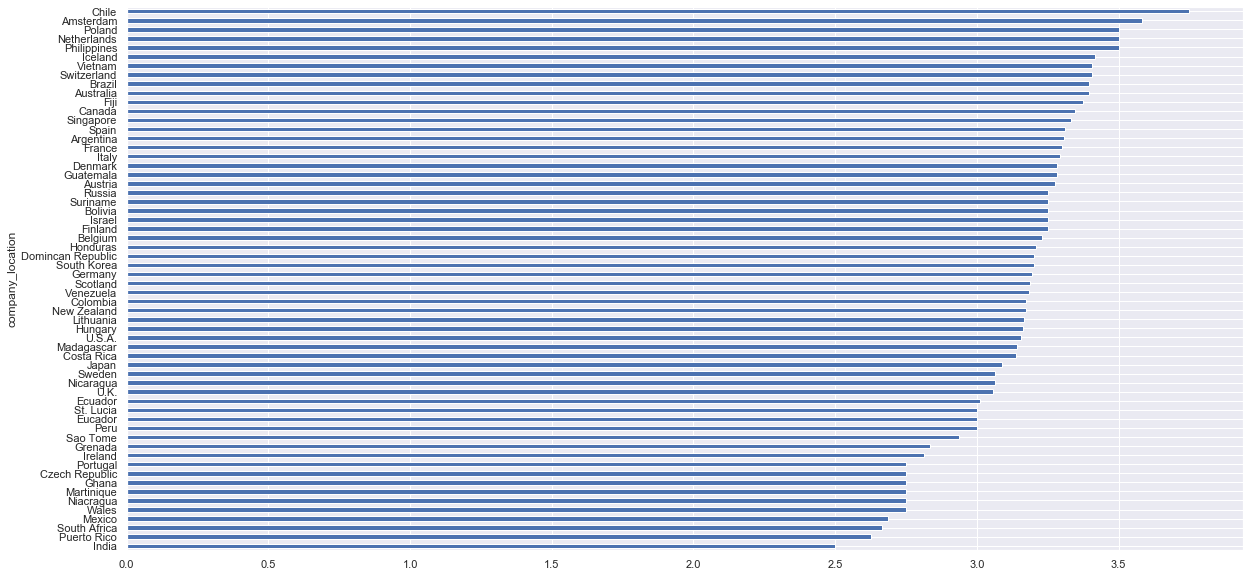

In [326]:
# Es bewegen sich also ca. zwei Drittel der Bewertungen in der oberen Skala. Die meisten Kritiker waren also dazu geneigt 
# eher positiv zu bewerten.

# Jetzt sollte alles passen. Versuchen wir es nochmal mit den Orten an denen die besten Schokoladenproduzenten angesiedelt sind.
sns.set(font_scale=1)
ax = df.groupby(['company_location'])['rating'].mean().sort_values().plot.barh(figsize=(20,10))
plt.show()

In [327]:
# Chile ist hier der klare Gewinner.

# Wir wollen in unserer Analyse natürlich auch herausfinden, was zu einer guten Bewertung führt. Ein Feature, 
# welches damit zusammen hängen könnte ist der Kakaogehalt. Wir berechnen nun also die Korrelationskoeffizienten 
# dieser beiden Spalten.
df.corr()

review_update_value  review_pub_date  cocoa_percentage  \
review_update_value             1.000000         0.985334          0.035736   
review_pub_date                 0.985334         1.000000          0.037171   
cocoa_percentage                0.035736         0.037171          1.000000   
rating                          0.079425         0.074608         -0.147188   

                       rating  
review_update_value  0.079425  
review_pub_date      0.074608  
cocoa_percentage    -0.147188  
rating               1.000000

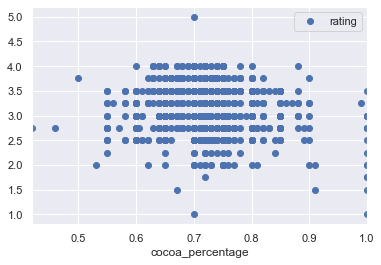

In [328]:
# Der Wert "-0.147188" deutet auf keine Korrelation hin. Um das zu untermauern, stellen wir die Spalten noch graphisch dar.
df.plot(x='cocoa_percentage', y='rating', style='o')

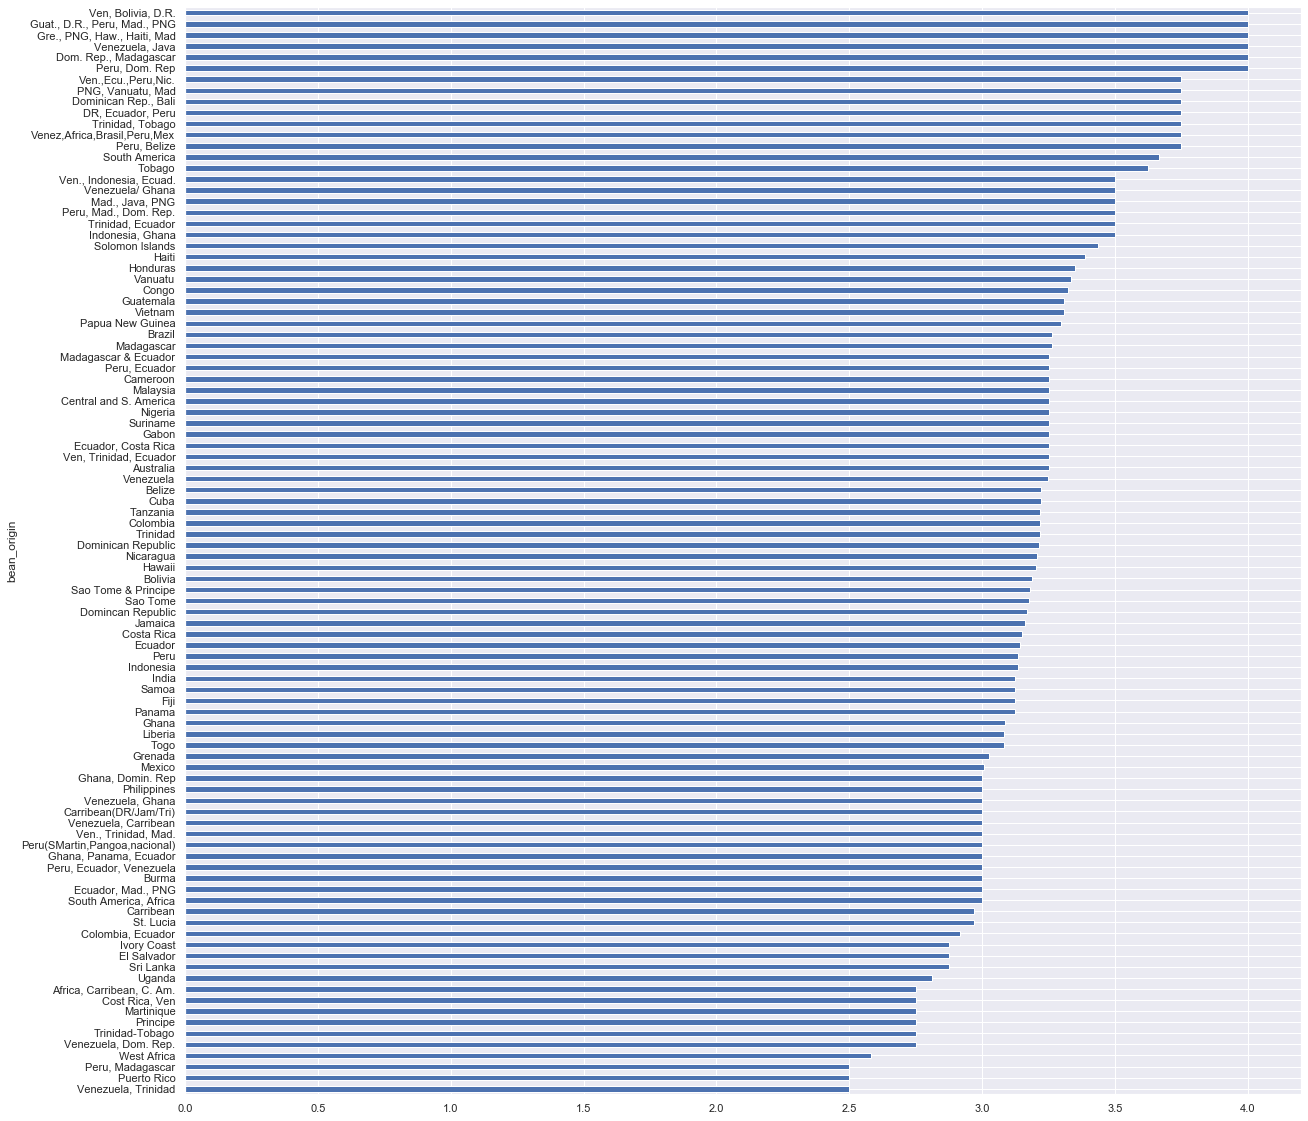

In [329]:
# An diesem Plot lässt sich lediglich feststellen, dass die Schockoladen mit den besten Ratings einen Kakaogehlat von ca. 70%
# aufweisen. Sonst scheinen die beiden Spalten unkorelliert zu sein. Aber es muss nicht immer kompliziert sein. 
# Die Korrelationsanalyse hat nichts ergeben, aber dennoch können wir was finden, 
# wenn wir die Daten wieder einfach nur geschickt sortieren.
# So können wir zum Beispiel herausfinden, welche Kakaobohnen für die besten Bewertungen sorgen.
ax = df.groupby(['bean_origin'])['rating'].mean().sort_values().plot.barh(figsize=(20,20))
plt.show()

In [330]:
# Hier lautet die Antwort Venezuela, Bolivien und die Dominikanische Republik. 
# Solltet ihr also jemals wieder Schokolade essen, kauft sie am besten bei einer Firma aus Chile,
# die ihre Kakaobohnen aus Venezuela, Bolivien oder die Dominikanische Republik importiert 
# und bei ihrem Produkt auf einen Kakaogehalt von ca. 70% achtet.

# Dies mag vielleicht ein etwas unbefriedigendes resultat sein, allerdings ist die Moral die man hier mitnehmen sollte
# umso wichtiger: immer genau hinschauen wie Missing Values annotiert werden! Sonst könnte die Analyse völlig
# hinfällig werden.

# Danke fürs anschauen dieser Jupyter Notebook Datei und Hören des Podcasts. Seid auch gespannt auf die nächste Folge von 
# The Erium Podcast in der wir euch alles wissenswerte für CLUSTERING in der Arbeitswelt verraten. 
# Natürlich wieder mit passendem Jupyter Notebook. :D